# EDA - Single Variable Analysis (Univariate Analysis)

### Import Basic Packages & Data 

We will import the student grades dataset once again to explore various univariate analysis techniques.

In [1]:
#Basics
import numpy as np
import pandas as pd

In [2]:
# Import data to a pandas dataframe
df_grades = pd.read_csv('student_grades_eda.csv')
df_grades.head()

# We will be working with the student grades EDA dataset. The target variable in this instance is the grade average of the student.

,student_ID,first_name,last_name,faculty,tuition,OH_participated,classes_skipped,grade_avg
0,20123456,John,Park,Arts,44191,0,5,B
1,20123457,Alex,Great,Science,32245,4,10,B
2,20123458,Sebastian,Taylor,Business,42679,6,7,B
3,20123459,Michael,Bay,Math,46478,15,2,A
4,20123460,Scott,Foster,Engineering,36784,5,8,A


### Descriptive Stats for Numeric Features

In [3]:
# Summary of statistics
df_grades['classes_skipped'].describe()

count    30.000000
mean      4.733333
std       3.027840
min       0.000000
25%       2.250000
50%       4.000000
75%       7.000000
max      10.000000
Name: classes_skipped, dtype: float64

In [4]:
# Manually return a statistic of interest 
print(df_grades['tuition'].mean())
print(df_grades['tuition'].quantile(0.25))
print(df_grades['tuition'].std())
print(df_grades['tuition'].var())

40307.066666666666
34824.75
5792.681196447648
33555155.44367816


### Basic packages for data visualization

In [5]:
# basic packages for visualization. 
import seaborn as sns
import matplotlib.pyplot as plt

### Basic Plots for Numeric Features

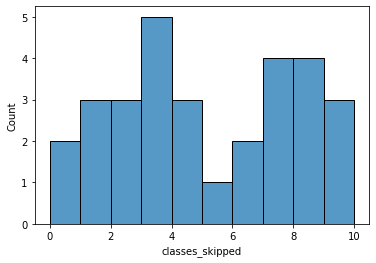

In [6]:
# Show a basic histplot of the ClassesSkipped column 
histplot = sns.histplot(data = df_grades, x ='classes_skipped', binwidth = 1)

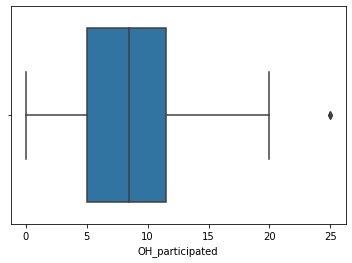

In [7]:
# Plot a box plot for the office hours participated column. 
boxplot = sns.boxplot(data = df_grades, x = 'OH_participated')

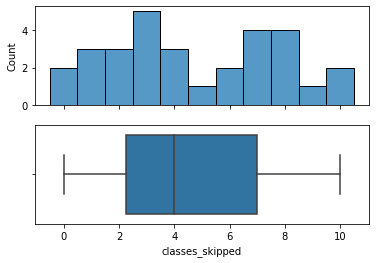

In [8]:
# Plot a histogram and blox plot together and make them share the same axis
fig, (hist, box) = plt.subplots(2, 1,sharex=True)
histplot = sns.histplot(data = df_grades, x ='classes_skipped', discrete = True, ax = hist)
boxplot = sns.boxplot(data = df_grades, x = 'classes_skipped', orient='h', ax = box)

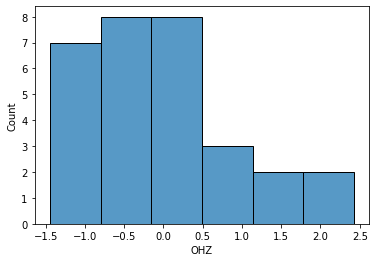

In [9]:
#Plot the Z scores of the values in a column
mean = df_grades['OH_participated'].mean()
std = df_grades['OH_participated'].std()
df_grades['OHZ'] = (df_grades['OH_participated'] - mean )/ std
histplot = sns.histplot(data = df_grades, x ='OHZ')

### Basic Plots for Categorical Features

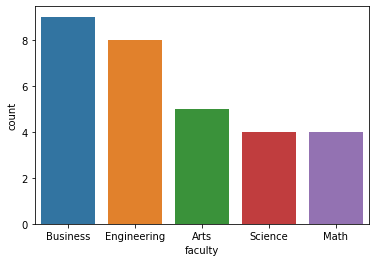

In [10]:
# Plot the count of the categories in the Faculty column and then order them.
# faculty_counts = df_grades['faculty'].value_counts().index
countplot = sns.countplot(data = df_grades, x ='faculty', order = df_grades['faculty'].value_counts().index)

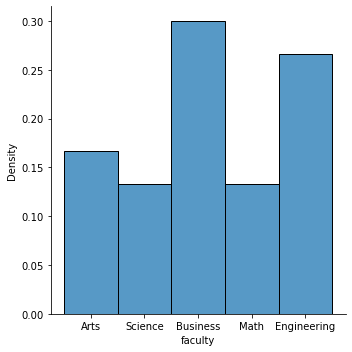

In [11]:
# Plot the percentage of observations in each category and order by frequency
displot = sns.displot(data = df_grades, x ='faculty', stat="density" )

Another way of displaying categorical values is with the use of pie charts. 

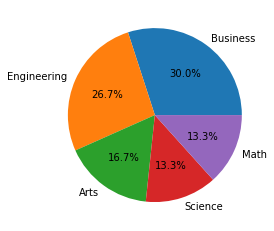

In [12]:
# Plotting via pie chart
pie_data = df_grades['faculty'].value_counts()
plt.pie(pie_data.values, labels = pie_data.index, autopct="%.1f%%")
plt.show()

### Visuals for Categorical Features

We will now import our data Indian Car Dataset. This dataset has the information of cars sold as well as their attributes. We will first look at creating visuals for the categorical features in this dataset.

In [26]:
# import data
df_cars = pd.read_csv('indian_cars_dataset.csv')
df_cars

,ending_price,starting_price,reviews_count,max_torque_nm,max_torque_rpm,max_power_bhp,max_power_rp,fuel_tank_capacity,no_cylinder,rating,seating_capacity,fuel_type,engine_displacement,transmission_type,body_type,car_name
0,583000,399000,51,89.0,3500,65.71,5500,27.0,3,4.5,5.0,Petrol,998,Automatic,Hatchback,Maruti Alto K10
1,1396000,799000,86,136.8,4400,101.65,6000,48.0,4,4.5,5.0,Petrol,1462,Automatic,SUV,Maruti Brezza
2,1603000,1353000,242,300.0,2800,130.00,3750,57.0,4,4.5,4.0,Diesel,2184,Automatic,SUV,Mahindra Thar
3,2458000,1318000,313,450.0,2800,182.38,3500,60.0,4,4.5,7.0,Diesel,2198,Automatic,SUV,Mahindra XUV700
4,2390000,1199000,107,400.0,2750,172.45,3500,57.0,4,4.5,7.0,Diesel,2198,Automatic,SUV,Mahindra Scorpio-N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,999000,659000,35,500.0,5250,415.71,6750,0.0,4,4.5,5.0,Petrol,1991,Automatic,Hatchback,Mercedes-Benz AMG A 45 S
199,1041000,1041000,3,400.0,4400,254.79,5000,59.0,4,4.5,5.0,Petrol,1998,Automatic,Sedan,BMW 3 Series Gran Limousine
200,2075000,1615000,2,350.0,2500,167.67,3750,60.0,4,4.5,7.0,Diesel,1956,Manual,SUV,MG Hector Plus
201,21700000,21700000,9,800.0,4500,591.39,6000,85.0,8,3.5,5.0,Petrol,3998,Automatic,SUV,Audi RS Q8


In [27]:
# Filter for SUVs
df_cars[df_cars['body_type'] == 'SUV']

,ending_price,starting_price,reviews_count,max_torque_nm,max_torque_rpm,max_power_bhp,max_power_rp,fuel_tank_capacity,no_cylinder,rating,seating_capacity,fuel_type,engine_displacement,transmission_type,body_type,car_name
1,1396000,799000,86,136.8,4400,101.65,6000,48.0,4,4.5,5.0,Petrol,1462,Automatic,SUV,Maruti Brezza
2,1603000,1353000,242,300.0,2800,130.00,3750,57.0,4,4.5,4.0,Diesel,2184,Automatic,SUV,Mahindra Thar
3,2458000,1318000,313,450.0,2800,182.38,3500,60.0,4,4.5,7.0,Diesel,2198,Automatic,SUV,Mahindra XUV700
4,2390000,1199000,107,400.0,2750,172.45,3500,57.0,4,4.5,7.0,Diesel,2198,Automatic,SUV,Mahindra Scorpio-N
5,4957000,3240000,99,500.0,2800,201.15,3400,80.0,4,4.5,7.0,Diesel,2755,Automatic,SUV,Toyota Fortuner
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,397000,391000,6,850.0,4500,631.62,6000,0.0,8,3.5,4.0,Petrol,3996,Automatic,SUV,Porsche Cayenne Coupe
196,5690000,5450000,1,350.0,2500,170.00,3750,60.0,4,4.5,5.0,Diesel,1998,Automatic,SUV,Compass Trailhawk
197,2075000,1615000,78,350.0,2500,167.67,3750,60.0,4,4.5,7.0,Diesel,1956,Automatic,SUV,Jeep Meridian
200,2075000,1615000,2,350.0,2500,167.67,3750,60.0,4,4.5,7.0,Diesel,1956,Manual,SUV,MG Hector Plus


In [28]:
# Find the count of each transmission type for SUVs
df_cars[df_cars['body_type'] == 'SUV']['transmission_type'].value_counts()


Automatic    76
Manual        9
Name: transmission_type, dtype: int64

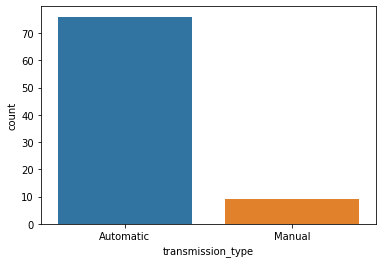

In [29]:
# Plot the count plot
data = df_cars[df_cars['body_type'] == 'SUV']['transmission_type']
countplot = sns.countplot(x = data)


### Visuals for Numeric Features

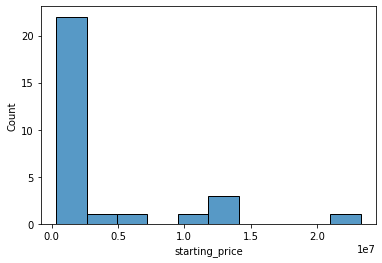

In [30]:
# Plot the distribution for manual transmission
histplot = sns.histplot(data = df_cars[df_cars['transmission_type']=='Manual'], x ='starting_price', bins = 10)

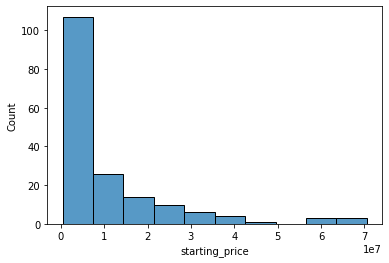

In [31]:
# Plot the distribution for automatic transmission
histplot = sns.histplot(data = df_cars[df_cars['transmission_type']=='Automatic'], x ='starting_price', bins = 10)

In [32]:
# Calculate mean starting price of each transmission type
print('Automatic:', df_cars[df_cars['transmission_type']=='Automatic']['starting_price'].mean())
print('Manual:', df_cars[df_cars['transmission_type']=='Manual']['starting_price'].mean())

Automatic: 10446344.827586208
Manual: 3427413.793103448
